# 2.3.8 신경망(딥러닝)
- 신경망이라 알려진 알고리즘들은 최근 '딥러닝'이란 이름으로 다시 주목받고 있음.
- 딥러닝이 많은 머신러닝 애플리케이션에서 매우 희망적인 성과를 보여주고 있지만, 특정 분야에 정교하게 적용되어 있을 때가 많음.
- 여기서는 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있는 다층 퍼셉트론(MLP)을 다루겠음.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
import graphviz

matplotlib.rcParams['axes.unicode_minus'] = False
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

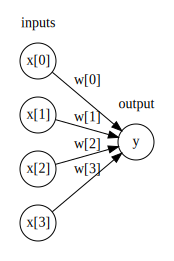

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

-> 입력 특성과 예측은 노드로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀

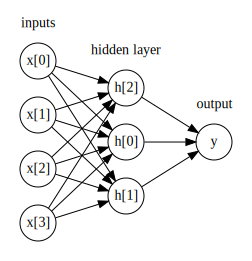

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

-> 은닉층이 하나인 다층 퍼셉트론

Text(0,0.5,'relu(x), tanh(x)')

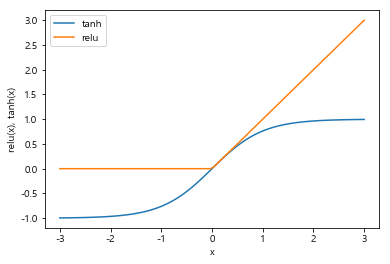

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

-> 하이퍼볼릭 탄젠트 활성화 함수와 렐루 활성화 함수

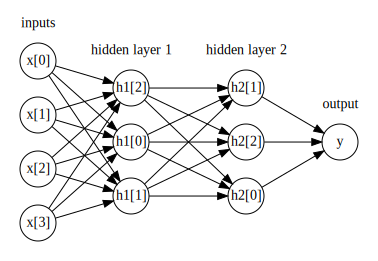

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

## 신경망 튜닝

Text(0,0.5,'특성 1')

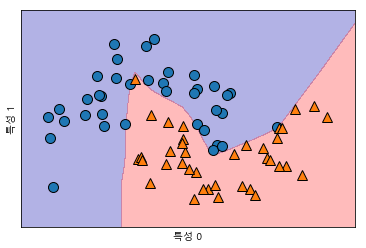

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 은닉 유닛이 100개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계

Text(0,0.5,'특성 1')

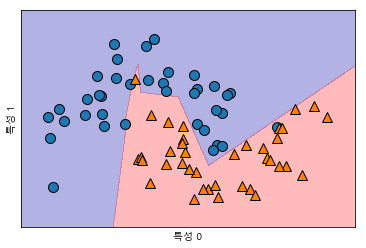

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계

Text(0,0.5,'특성 1')

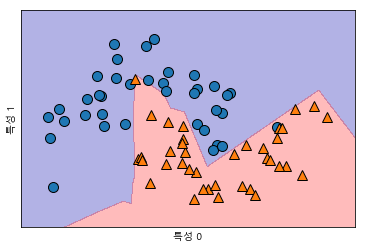

In [8]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 10개의 은닉 유닛을 가진 두 개의 은닉층과 렐루 활성화 함수로 만든 결정 경계

Text(0,0.5,'특성 1')

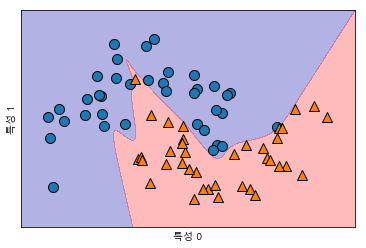

In [9]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 10개의 은닉 유닛을 가진 두 개의 은닉층과 tanh 활성화 함수로 만든 결정 경계